In [17]:
import os
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import cv2

In [22]:
root_path = "../../Data/Experiment_1"
ref_path = os.path.join(root_path, "im_ref.png")

In [16]:
imgs_path = [p for p in glob(os.path.join(root_path, "*png")) if "ref" not in p]
imgs_path = list(natsorted(imgs_path))
imgs_path[:6]

['../../Data/Experiment_1/im_spectral_1.png',
 '../../Data/Experiment_1/im_spectral_2.png',
 '../../Data/Experiment_1/im_spectral_3.png',
 '../../Data/Experiment_1/im_spectral_4.png',
 '../../Data/Experiment_1/im_spectral_5.png',
 '../../Data/Experiment_1/im_spectral_6.png']

In [18]:
def load_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [23]:
ref_img = load_img(ref_path)
imgs = np.array([load_img(p) for p in imgs_path])
ref_img.shape, imgs.shape

((256, 256, 3), (30, 256, 256, 3))

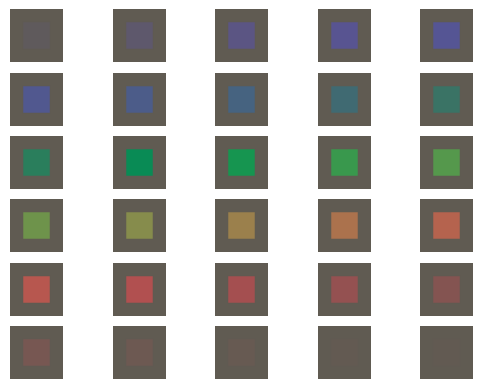

In [20]:
fig, axes = plt.subplots(6,5)
for im, ax in zip(imgs, axes.ravel()):
    ax.imshow(im)
    ax.axis("off")
plt.show()

In [24]:
def model(img):
    return img
def calculate_diffs(img1, img2):
    a, b = model(img1), model(img2)
    return ((a-b)**2).mean(axis=(1,2,3))**(1/2)

In [25]:
diffs = calculate_diffs(imgs, ref_img[None,...])
diffs.shape

(30,)

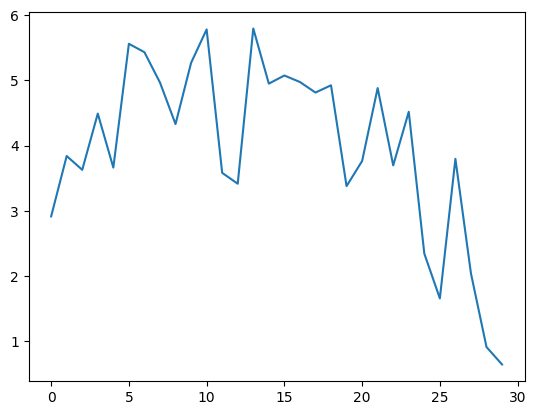

In [26]:
plt.plot(diffs)
plt.show()